<a href="https://colab.research.google.com/github/rupangdalai/CodSoft/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = 'Churn_Modelling.csv'


try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully!")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at '{file_path}'")
    print("Please make sure the file path is correct and the file exists.")
    exit() # Exit the script if the file isn't found

Data loaded successfully!

First 5 rows of the dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

categorical_features = ['Geography', 'Gender']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"\n--- {name} Results ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned']))





--- Logistic Regression Results ---
Accuracy: 0.8080

Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.82      0.97      0.89      1593
     Churned       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


--- Random Forest Results ---
Accuracy: 0.8575

Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.87      0.97      0.92      1593
     Churned       0.76      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000


--- Gradient Boosting Results ---
Accuracy: 0.8690

Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.88      0.96      0.92      1593
     Churne

Saved confusion matrix plot to Gradient_Boosting_confusion_matrix.png

Model training and evaluation complete!


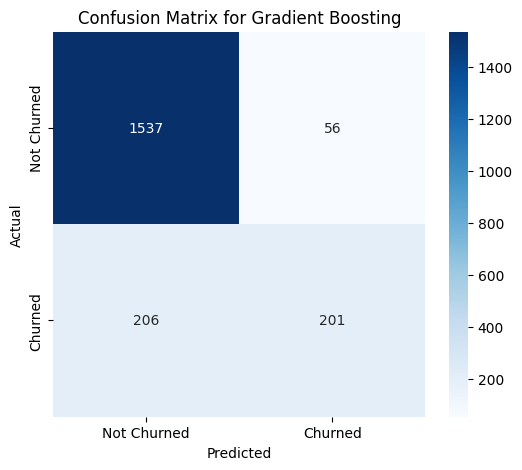

In [ ]:
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Churned', 'Churned'],
                yticklabels=['Not Churned', 'Churned'])
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig(f'{name.replace(" ", "_")}_confusion_matrix.png')
    print(f"Saved confusion matrix plot to {name.replace(' ', '_')}_confusion_matrix.png")

print("\nModel training and evaluation complete!")